1. Import Required Libraries

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, mean_absolute_error, ConfusionMatrixDisplay, mean_squared_error, f1_score, classification_report, recall_score, RocCurveDisplay, roc_curve, auc)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

2. Data Loading and Exploration

In [4]:
# Load the dataset
df= pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
# df= pd.read_csv('diabetesDataset.csv')

# Display the first 5 rows of the dataset to understand its structure
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# Check for any missing values in the dataset
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
# Display information about data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
# Display summary statistics of numerical columns to get a quick sense of the data distribution
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


3. Data Preprocessing and Visualization

In [9]:
# Check for duplicate rows in the dataset
print("Duplicate Rows:")
print(df.duplicated().sum())

Duplicate Rows:
24206


In [10]:
# Drop duplicate rows to ensure data integrity
df = df.drop_duplicates()
print("Duplicate Rows:")
print(df.duplicated().sum())

Duplicate Rows:
0


In [11]:
# Check if the target variable (Diabetes_binary) is balanced
df['Diabetes_binary'].value_counts()

Diabetes_binary
0.0    194377
1.0     35097
Name: count, dtype: int64

<Axes: xlabel='Diabetes_binary', ylabel='count'>

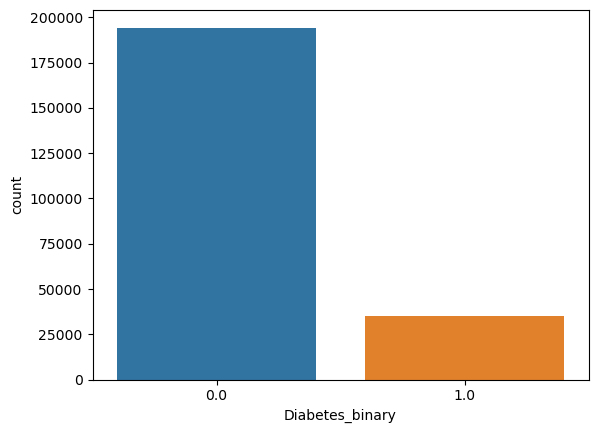

In [12]:
# Visualize the distribution of the target variable
sns.countplot(data=df,x='Diabetes_binary')

5. Unique Value Exploration for each feature

In [15]:
# Display unique values for each column to understand the variety of data
for col in df.columns:
    print(f"{col}: {np.sort(df[col].unique())}")

Diabetes_binary: [0. 1.]
HighBP: [0. 1.]
HighChol: [0. 1.]
CholCheck: [0. 1.]
BMI: [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.
 84. 85. 86. 87. 88. 89. 90. 91. 92. 95. 96. 98.]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [0. 1.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [0. 1.]
NoDocbcCost: [0. 1.]
GenHlth: [1. 2. 3. 4. 5.]
MentHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
PhysHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
DiffWalk: [0. 1.]
Sex: [0. 1.]
Age: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13

6. Featuer Grouping by Category

In [17]:
# Group columns into categories for easier handling later
category_socialecom = ['Age', 'Sex', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
category_disease = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
category_health = ['GenHlth', 'MentHlth', 'PhysHlth']
category_habit = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

7. Data Visualization and Feature Exploration

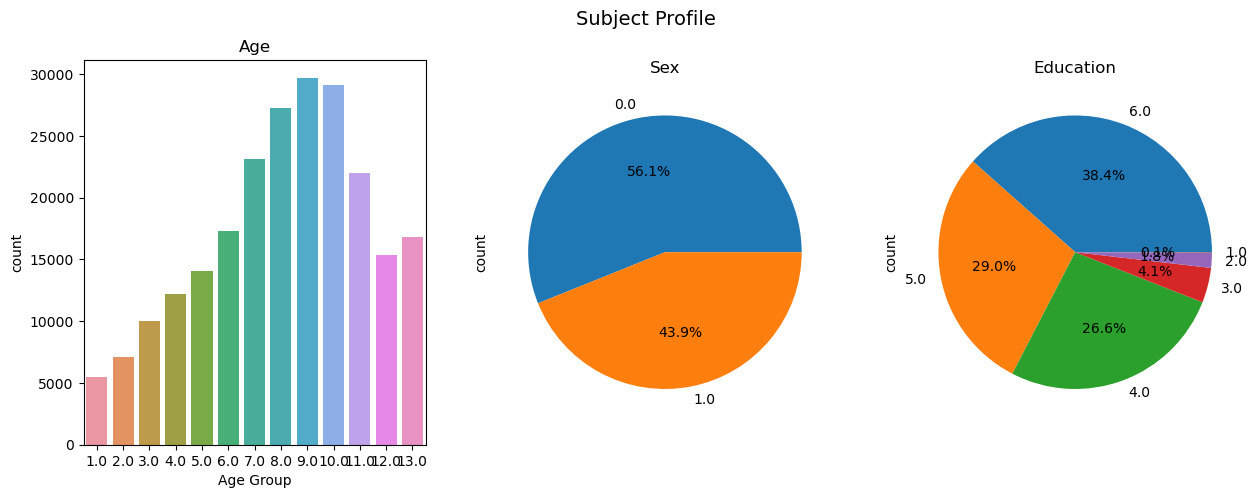

In [24]:
# Visualize social categories
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Visualize age, sex, education
axes = axes.flatten()
sns.countplot(x='Age', data=df, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')

for i, col in enumerate(['Sex', 'Education']):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i+1], title=col)
plt.suptitle('Subject Profile', fontsize=14)
plt.show()

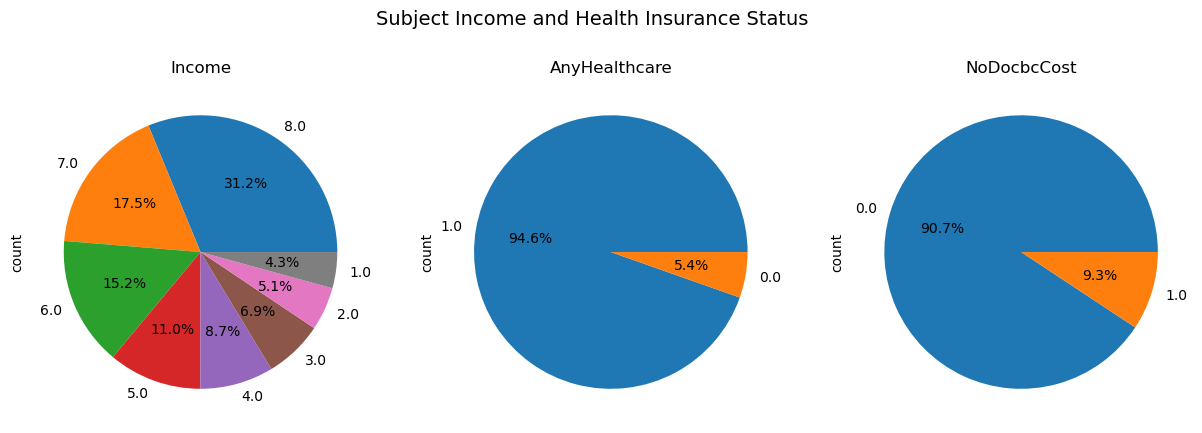

In [27]:
# Visualize income, anyHealthcare, NodocbcCost
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['Income', 'AnyHealthcare', 'NoDocbcCost']):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=col)
plt.suptitle('Subject Income and Health Insurance Status', fontsize=14)
plt.show()

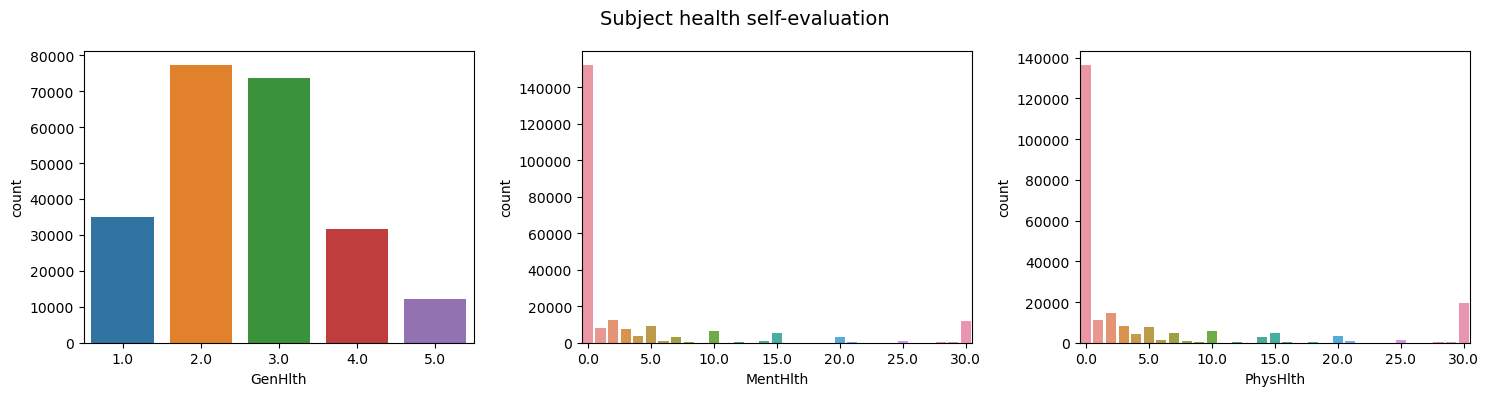

In [29]:
# visualize Health Metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, col in enumerate(category_health):
    g = sns.countplot(x=col, data=df, ax=axes[i])
    if len(df[col].unique()) > 5:
        g.set_xticks(np.arange(0, len(df[col].unique()), 5))
plt.suptitle('Subject health self-evaluation', fontsize=14)
plt.tight_layout()
plt.show()

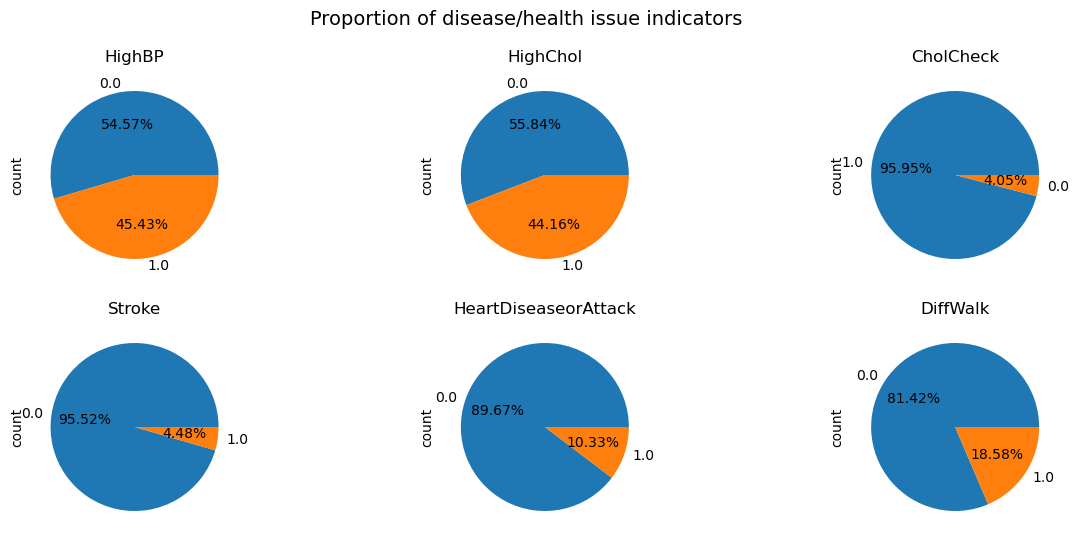

In [32]:
# Distribution of binary health indicators using a pie chart
fig, ax = plt.subplots(2, 3, figsize=(15, 6))
for i, col in enumerate(category_disease):
    df[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of disease/health issue indicators', fontsize=14)
plt.show()

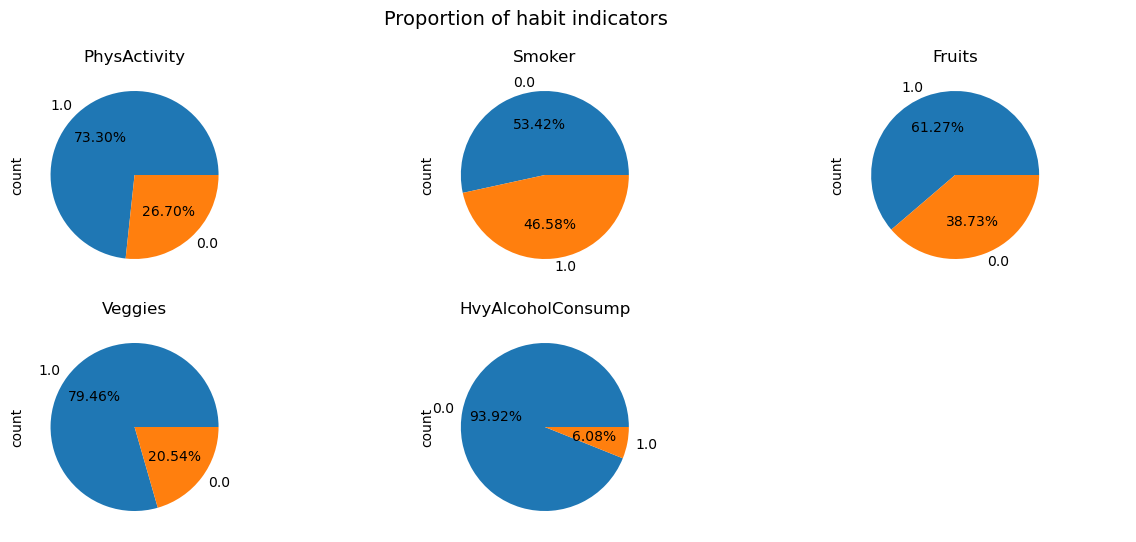

In [33]:
# Distribution of the habit indicators
fig, ax = plt.subplots(2, 3, figsize=(15, 6))
for i, col in enumerate(category_habit):
    df[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
ax[1, 2].axis('off')
plt.suptitle('Proportion of habit indicators', fontsize=14)
plt.show()

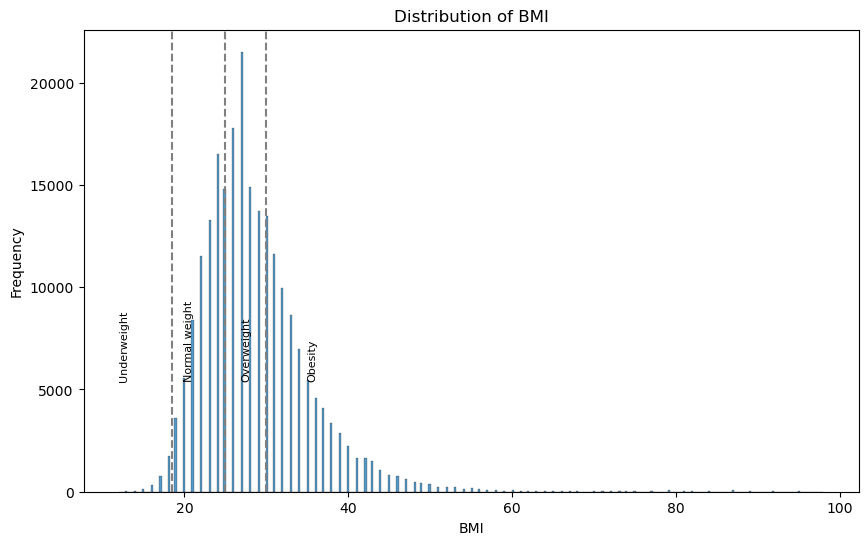

In [35]:
# Distribution of BMI

# Notes:
# Underweight: BMI less than 18.5
# Normal weight: BMI between 18.5 and 24.9
# Overweight: BMI between 25 and 29.9
# Obesity: BMI of 30 or greater

# Convert infinite values to NaN if any
df['BMI'] = df['BMI'].replace([float('inf'), float('-inf')], pd.NA)

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=False)

plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')

plt.text(12, 5500, 'Underweight', rotation=90, size=8)
plt.text(20, 5500, 'Normal weight', rotation=90, size=8)
plt.text(27, 5500, 'Overweight', rotation=90, size=8)
plt.text(35, 5500, 'Obesity', rotation=90, size=8)

# Title and show plot
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

8. Correlation Analysis

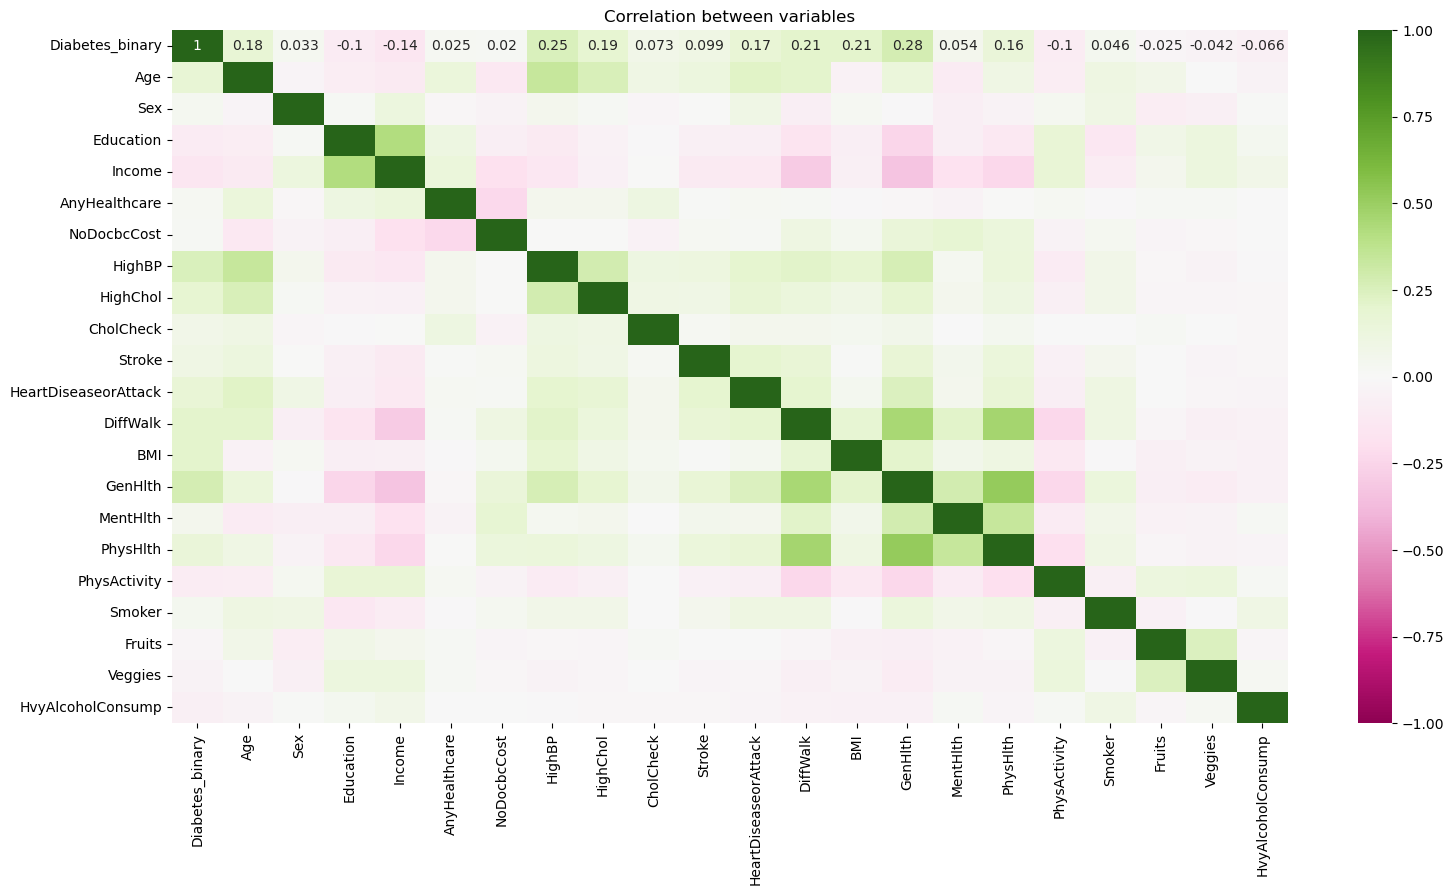

In [38]:
# plot a heatmap to check the correlation between the variables for better grouping and interpretation,sort columns by the list of columns created above
cols = ['Diabetes_binary'] + category_socialecom + category_disease +  ['BMI'] + category_health + category_habit

plt.figure(figsize=(18, 9))
# nomralize the color scale
sns.heatmap(df[cols].corr(), annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

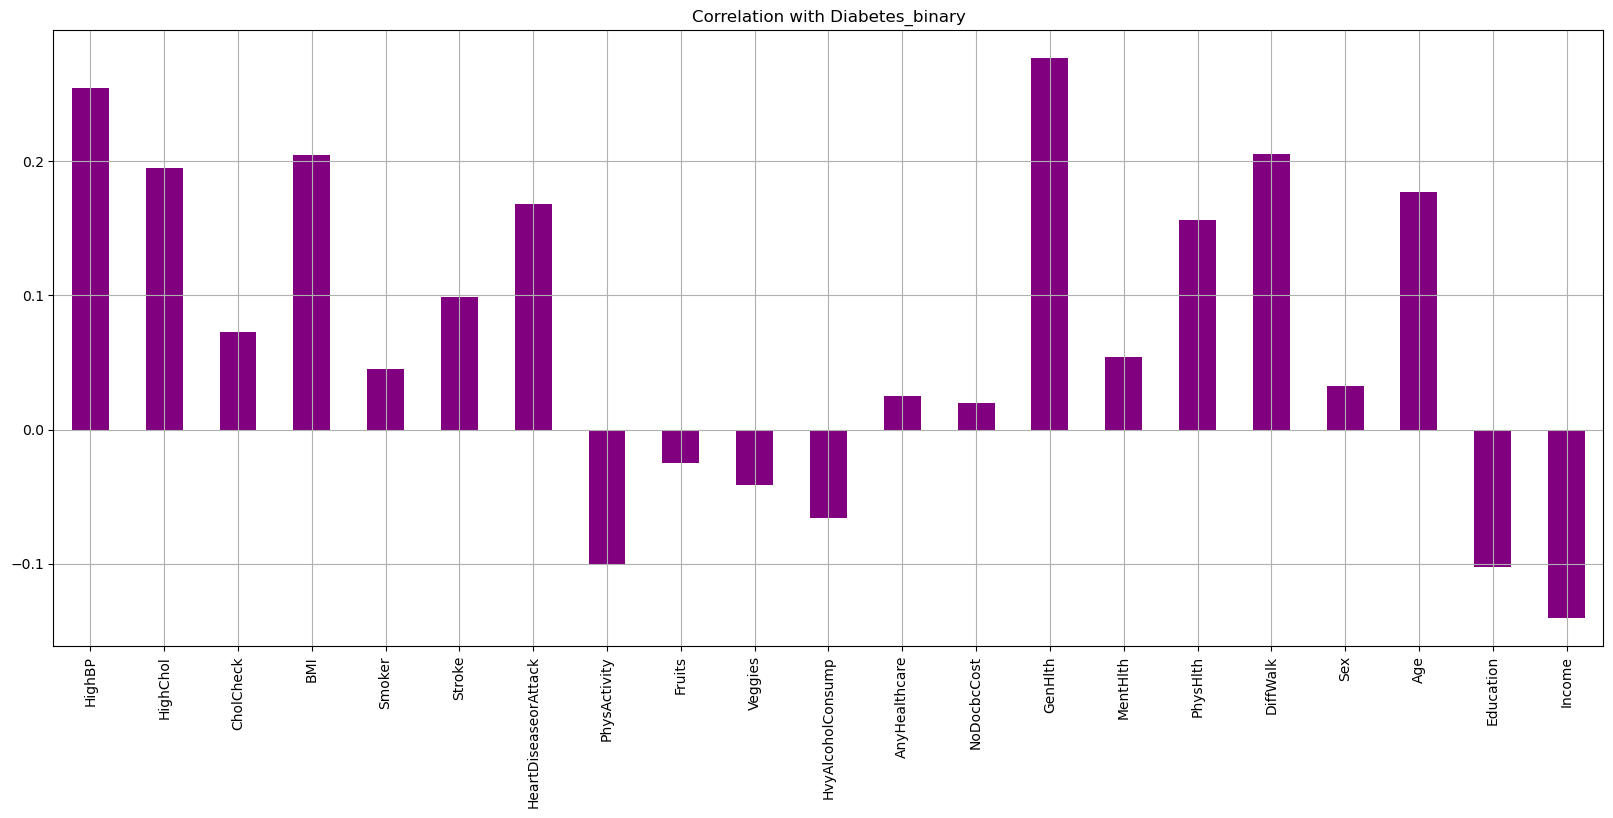

In [39]:
# Feature Correlation with Target Variable

# The following bar chart visualizes the correlation between each feature in the dataset and the target variable `Diabetes_binary`. 
# The height of each bar represents the strength and direction of the correlation (positive or negative). 
# This analysis helps in identifying which features are most influential in predicting the target variable.
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
                                                                     , title="Correlation with Diabetes_binary",color="Purple")

9. Data Preparation

In [42]:
X=df.drop("Diabetes_binary",axis=1)
Y=df["Diabetes_binary"]

In [44]:
# Handling imbalanced data
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm,y_sm= nm.fit_resample(X,Y)
y_sm.shape , x_sm.shape

((70194,), (70194, 21))

In [46]:
y_sm.value_counts()

Diabetes_binary
0.0    35097
1.0    35097
Name: count, dtype: int64

In [47]:
# Splitting the Data
# Training Set: 70% of the data
# Testing Set: 30% of the data
X_train , X_test , Y_train , Y_test = train_test_split(x_sm,y_sm, test_size=0.3 , random_state=42)

10. Model Training

In [50]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

LogisticRegression(max_iter=1500)

11. Making Predictions

In [52]:
# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

Training set score: 0.8518
Test set score: 0.8489


12. Evaluating the Model

Confusion matrix:
[[9681  787]
 [2394 8197]] 



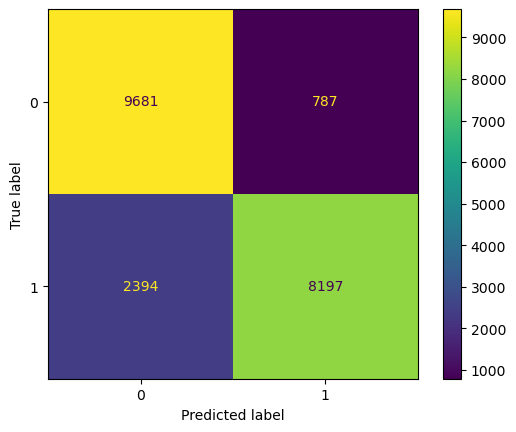

In [55]:
#confusion matric
print(f'Confusion matrix:\n{confusion_matrix(Y_test,y_pred)} \n')
# Plot confusion matrix 
graph_confusion_matrix = ConfusionMatrixDisplay(confusion_matrix(Y_test,y_pred)).plot()

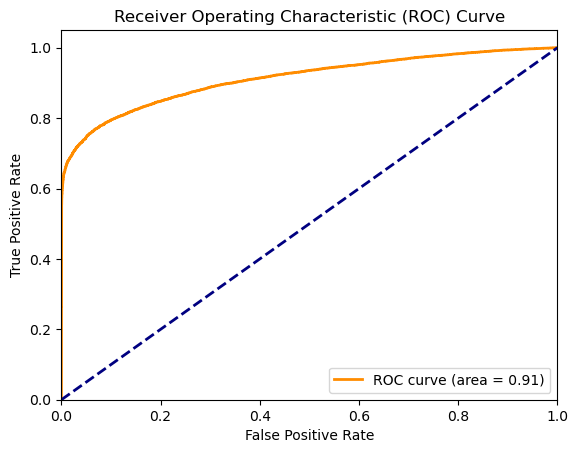

In [57]:
# ROC Curve and AUC (Binary Classification)
if len(set(Y_test)) == 2:
    # Calculate predicted probabilities for positive class
    y_pred_proba = lg.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [59]:
matrix = classification_report(Y_test,y_pred)
print(matrix)
print('Accuracy Score :', accuracy_score(y_pred, Y_test))
print('f1 Score :', f1_score(Y_test,y_pred, average="weighted"))
print('Recall Score :', recall_score(Y_test,y_pred, average="weighted"))
print('Mean Absolute Error :',mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error : ',mean_squared_error(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86     10468
         1.0       0.91      0.77      0.84     10591

    accuracy                           0.85     21059
   macro avg       0.86      0.85      0.85     21059
weighted avg       0.86      0.85      0.85     21059

Accuracy Score : 0.8489481931715656
f1 Score : 0.8481318698191512
Recall Score : 0.8489481931715656
Mean Absolute Error : 0.1510518068284344
Mean Squared Error :  0.1510518068284344


Predicting Diabetes with sample input data

In [71]:
#Diabetes person data sample
input_data = np.array([
    1,  # HighBP
    1,  # HighChol
    1,  # CholCheck
    35, # BMI
    1,  # Smoker
    1,  # Stroke
    1,  # HeartDiseaseorAttack
    0,  # PhysActivity
    1,  # Fruits
    0,  # Veggies
    1,  # HvyAlcoholConsump
    1,  # AnyHealthcare
    1,  # NoDocbcCost
    3,  # GenHlth
    10, # MentHlth
    19, # PhysHlth
    1,  # DiffWalk
    1,  # Sex
    21, # Age
    2,  # Education
    1   # Income
]).reshape(1, -1)


#Non diabetes person data sample
# input_data = np.array([
#     0,  # HighBP 
#     0,  # HighChol 
#     1,  # CholCheck (
#     22, # BMI 
#     0,  # Smoker 
#     0,  # Stroke 
#     0,  # HeartDiseaseorAttack 
#     1,  # PhysActivity 
#     1,  # Fruits 
#     1,  # Veggies 
#     0,  # HvyAlcoholConsump 
#     1,  # AnyHealthcare 
#     0,  # NoDocbcCost 
#     1,  # GenHlth
#     0,  # MentHlth 
#     0,  # PhysHlth 
#     0,  # DiffWalk
#     0,  # Sex 
#     6,  # Age 
#     3,  # Education 
#     4   # Income 
# ]).reshape(1, -1)
# input_data = np.array([0,0,1,20,0,0,0,1,1,1,0,1,0,2,0,0,0,0,8,6,8]).reshape(1, -1)

# Display the input data with labels
labels = [
    "High Blood Pressure",              # HighBP
    "High Cholesterol",                 # HighChol
    "Cholesterol Check",                # CholCheck
    "Body Mass Index (BMI)",            # BMI
    "Smoker",                           # Smoker
    "Stroke",                           # Stroke
    "Heart Disease or Heart Attack",    # HeartDiseaseorAttack
    "Physical Activity",                # PhysActivity
    "Fruits Consumption",               # Fruits
    "Vegetables Consumption",           # Veggies
    "Heavy Alcohol Consumption",        # HvyAlcoholConsump
    "Access to Healthcare",             # AnyHealthcare
    "Avoided Doctor Due to Cost",       # NoDocbcCost
    "General Health Status",            # GenHlth
    "Mental Health Days",               # MentHlth
    "Physical Health Days",             # PhysHlth
    "Difficulty Walking",               # DiffWalk
    "Sex (0: Male, 1: Female)",         # Sex
    "Age Group",                        # Age
    "Level of Education",               # Education
    "Income Level"                      # Income
]
print("Input Data:\n")
for label, value in zip(labels, input_data[0]):
    print(f"{label:20}: {value}")

# Predict with the basic model
print('\nResult:')
prediction = lg.predict(input_data)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

Input Data:

High Blood Pressure : 1
High Cholesterol    : 1
Cholesterol Check   : 1
Body Mass Index (BMI): 35
Smoker              : 1
Stroke              : 1
Heart Disease or Heart Attack: 1
Physical Activity   : 0
Fruits Consumption  : 1
Vegetables Consumption: 0
Heavy Alcohol Consumption: 1
Access to Healthcare: 1
Avoided Doctor Due to Cost: 1
General Health Status: 3
Mental Health Days  : 10
Physical Health Days: 19
Difficulty Walking  : 1
Sex (0: Male, 1: Female): 1
Age Group           : 21
Level of Education  : 2
Income Level        : 1

Result:
The person is diabetic
